In [1]:
%load_ext autoreload
%autoreload 2

### Copying data

This example shows how *duqtools* can be used to copy data.

In [2]:
from duqtools.api import ImasHandle

First, we construct and Imas handle, consisting of the user name, database (sometimes referred to as machine name), shot and run number. Together these form an Imas path that point to some data on the system.

We can print the path, and check that the data exists.

Note that the user is optional. Duqtools will fill in the current user by default.

In [3]:
handle = ImasHandle(user='g2ssmee', db='jet', shot=94875, run=8000)
print(handle.path())
handle.exists()

/afs/eufus.eu/user/g/g2ssmee/public/imasdb/jet/3/0/ids_948758000.datafile


True

Let's say we want to make a copy of this data set to modify. We should construct a new Imas handle to specify the target location. In the next cell, we create the Imas handle from a string instead. Again, the user is optional, so the string `'jet/94875/8888'` would give the same result.

In [4]:
target = ImasHandle.from_string('g2ssmee/jet/94785/8888')
print(target.path())
target.exists()

/afs/eufus.eu/user/g/g2ssmee/public/imasdb/jet/3/0/ids_947858888.datafile


False

The template data can be copied to the new location.

In [5]:
handle.copy_data_to(target)
target.exists()

- Copy ids from template to : user='g2ssmee' db='jet' shot=94785 run=8888
INFO:operations:- Copy ids from template to : user='g2ssmee' db='jet' shot=94785 run=8888


True

If you are unhappy with the outcome, wecan delete the data using the `ImasHandle.delete()` method. Let's not do that for now.

In [6]:
# target.delete()
target.exists()

True

### Exploring, modifying, and saving data

We developed *duqtools* to make it as straightforward as possible to manipulate IDSs. In this section, we show an example of how one may go about doing so.

Let's say we want to look at 'core_profiles' > 'profiles_1d' > 't_i_average'.

First, we retrieve the 'core_profiles' IDS.

In [7]:
cp = target.get('core_profiles')
cp

IDSMapping(
  profiles_1d = ...
  vacuum_toroidal_field = ...
  time = ...
)

*Duqtools* wraps the IMAS database in a dict-like object, so that the different datasets can be accessed like a dict.

In [8]:
cp['profiles_1d/0/t_i_average']

array([10873.96082052, 10872.03673416, 10867.81168627, 10857.14694854,
       10839.70936357, 10810.41005674, 10768.73609831, 10717.18121687,
       10656.83014146, 10587.90629975, 10510.8825408 , 10426.32395967,
       10334.37851785, 10235.50941984, 10129.89201314, 10017.95409844,
        9899.86968924,  9776.03781595,  9646.63883809,  9512.05793477,
        9372.48695856,  9228.30672488,  9079.79858345,  8927.2307248 ,
        8771.001231  ,  8611.41002345,  8448.74656226,  8283.47218662,
        8115.83427092,  7946.37952659,  7775.362634  ,  7603.26181556,
        7430.46655014,  7257.31070955,  7084.25627928,  6911.64950335,
        6739.84399765,  6569.20529548,  6399.99075788,  6232.39309061,
        6067.04216858,  5904.90863603,  5746.40291772,  5591.66680358,
        5440.56835546,  5293.2622794 ,  5151.00788034,  5013.84737283,
        4880.92735065,  4752.21217566,  4627.47418283,  4506.80740179,
        4390.03306972,  4276.68716968,  4167.13381318,  4061.02844256,
      

In [9]:
cp['profiles_1d/0/t_i_average'] *= 1.1

Once we changed the data, we can sync the changes back to the data file.

In [10]:
cp.sync(target)

### Plotting data

The example below shows how can plot some data using matplotlib.

Text(0, 0.5, 't_i_average')

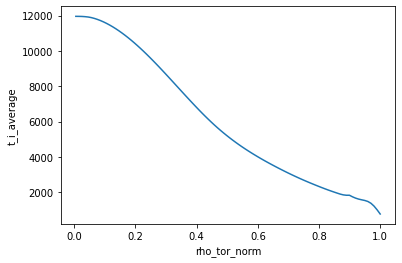

In [11]:
x = cp['profiles_1d/0/grid/rho_tor_norm']
y = cp['profiles_1d/0/t_i_average']

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('rho_tor_norm')
ax.set_ylabel('t_i_average')

*Duqtools* has some built-in plots as well, using [altair](https://altair-viz.github.io/), that are designed with larger data and interactivity sets in mind.

Let's first load a bunch of data sets. Note that we only extract the data we are interested in plotting (`x_val`, `y_val`). The data are loaded from the IDS using the search string: `<prefix>/<time step>/<key>`.

In [12]:
from duqtools.api import get_ids_dataframe

paths = (
    'jet/94875/8100',
    'jet/94875/8101',
    'jet/94875/8102',
    'jet/94875/8103',
    'jet/94875/8104',
)
handles = [ImasHandle.from_string(p) for p in paths]

x_val = 'grid/rho_tor_norm'
y_val = 't_i_average'

data = get_ids_dataframe(handles, keys=(x_val, y_val), prefix='profiles_1d')

INFO:duqtools.ids._io:Getting data for user='g2ssmee' db='jet' shot=94875 run=8100
INFO:duqtools.ids._io:Getting data for user='g2ssmee' db='jet' shot=94875 run=8101
INFO:duqtools.ids._io:Getting data for user='g2ssmee' db='jet' shot=94875 run=8102
INFO:duqtools.ids._io:Getting data for user='g2ssmee' db='jet' shot=94875 run=8103
INFO:duqtools.ids._io:Getting data for user='g2ssmee' db='jet' shot=94875 run=8104


Now we have the data in a nicely structured pandas dataframe.

In [13]:
data

,run,tstep,time,grid/rho_tor_norm,t_i_average
0,g2ssmee/jet/94875/8100,0,48.350001,0.005025,11222.752376
1,g2ssmee/jet/94875/8100,0,48.350001,0.015075,11215.894772
2,g2ssmee/jet/94875/8100,0,48.350001,0.025126,11202.113127
3,g2ssmee/jet/94875/8100,0,48.350001,0.035176,11181.387312
4,g2ssmee/jet/94875/8100,0,48.350001,0.045226,11153.648125
...,...,...,...,...,...
995,g2ssmee/jet/94875/8104,1,48.400000,0.959799,1346.744968
996,g2ssmee/jet/94875/8104,1,48.400000,0.969849,1254.328754
997,g2ssmee/jet/94875/8104,1,48.400000,0.979899,1108.851432
998,g2ssmee/jet/94875/8104,1,48.400000,0.989950,917.153623


In [14]:
from duqtools.api import alt_line_chart

chart = alt_line_chart(data, x=x_val, y=y_val)
chart

alt.Chart(...)

Alternatively, you can chose to plote the average value with an erroband representing the standard deviation.

Before we do so, we should note tha IMAS data may not be on the same grid (i.e. x-values do not corespond between data sets) or use the same time steps. Therefore, the data must be rebased so that the grid and time stamps corresponds between different data sets. Because this is such a common operation, *duqtools* has helper functions to deal with these special cases. `rebase_on_grid` helps to rebase on the grid, and `rebase_on_time` to rebase on the time stamps.

You must specify the grid to rebase on, i.e. the 'x-axis'. And the columns to rebase, i.e. the 'y-axes'. By default, he first data set will be used to get the reference grid. You can specify your own grid using the `base_grid` keyword.

In [15]:
from duqtools.api import rebase_on_grid

data = rebase_on_grid(data, grid=x_val, cols=(y_val, ))

The 'rebase time' step makes sure that all 

For example, your reference data set has timestamps (1, 2, 3, 4), and another (1, 3, 5). The data in the second data set will be interpolated to match the timestamps of the reference. 

If you know your data have the same time stamps, for example if they are from the same set of simulations, you can skip this step.

As before, you must specify the columns which should be rebased.

By default, he first data set will be used to get the reference timestamps. You can specify your own grid using the `base_time` keyword.

In [16]:
from duqtools.api import rebase_on_time

data = rebase_on_time(data, cols=(x_val, y_val))

Now that this is done, the data can be plotted using an error band.

In [17]:
from duqtools.api import alt_errorband_chart

chart = alt_errorband_chart(data, x=x_val, y=y_val)
chart

alt.LayerChart(...)